# Loading the Data

In [1]:
!pip3 install -U ucimlrepo 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [2]:
# import dataset
heart_disease = fetch_ucirepo(id=45)


# access data
X = heart_disease.data.features
y = heart_disease.data.targets

In [3]:
# access metadata
print(heart_disease.metadata.uci_id)
print(heart_disease.metadata.num_instances)
print(heart_disease.metadata.additional_info.summary)

# access variable info in tabular format
print(heart_disease.variables)

45
303
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs" 
        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categ

In [4]:
import pandas as pd

df = pd.concat([X, y], axis=1)

# Data is ready
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


# EDA

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# Data Preprocessing

In [6]:
df['num']

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64

In [7]:
# Convert Target Variable 'num' to binary

df['num'] = df['num'].apply(lambda x: 1 if x>0 else 0)

df['num']

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64

In [8]:
# Data Cleaning
df = df.dropna()
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
# One-Hot Encoding Categorical Variables

cat_cols = ['cp', 'restecg', 'slope', 'thal']

X = df.drop('num', axis=1)

X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6.0,thal_7.0
0,63,1,145,233,1,150,0,2.3,0.0,False,False,False,False,True,False,True,True,False
1,67,1,160,286,0,108,1,1.5,3.0,False,False,True,False,True,True,False,False,False
2,67,1,120,229,0,129,1,2.6,2.0,False,False,True,False,True,True,False,False,True
3,37,1,130,250,0,187,0,3.5,0.0,False,True,False,False,False,False,True,False,False
4,41,0,130,204,0,172,0,1.4,0.0,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,140,241,0,123,1,0.2,0.0,False,False,True,False,False,True,False,False,True
298,45,1,110,264,0,132,0,1.2,0.0,False,False,False,False,False,True,False,False,True
299,68,1,144,193,1,141,0,3.4,2.0,False,False,True,False,False,True,False,False,True
300,57,1,130,131,0,115,1,1.2,1.0,False,False,True,False,False,True,False,False,True


In [14]:
# Scaling Numerical Variables

from sklearn.preprocessing import StandardScaler

num_cols = [col for col in X.columns if col not in cat_cols]

scaler = StandardScaler()

X[num_cols] = scaler.fit_transform(X[num_cols])

X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6.0,thal_7.0
0,0.936181,0.691095,0.750380,-0.276443,2.430427,0.017494,-0.696419,1.068965,-0.721976,-0.444500,-0.622776,-0.957146,-0.116841,1.016979,-0.925338,3.625308,3.937004,-0.794901
1,1.378929,0.691095,1.596266,0.744555,-0.411450,-1.816334,1.435916,0.381773,2.478425,-0.444500,-0.622776,1.044772,-0.116841,1.016979,1.080686,-0.275839,-0.254000,-0.794901
2,1.378929,0.691095,-0.659431,-0.353500,-0.411450,-0.899420,1.435916,1.326662,1.411625,-0.444500,-0.622776,1.044772,-0.116841,1.016979,1.080686,-0.275839,-0.254000,1.258018
3,-1.941680,0.691095,-0.095506,0.051047,-0.411450,1.633010,-0.696419,2.099753,-0.721976,-0.444500,1.605713,-0.957146,-0.116841,-0.983304,-0.925338,3.625308,-0.254000,-0.794901
4,-1.498933,-1.446980,-0.095506,-0.835103,-0.411450,0.978071,-0.696419,0.295874,-0.721976,2.249717,-0.622776,-0.957146,-0.116841,1.016979,-0.925338,-0.275839,-0.254000,-0.794901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.272059,-1.446980,0.468418,-0.122330,-0.411450,-1.161395,1.435916,-0.734914,-0.721976,-0.444500,-0.622776,1.044772,-0.116841,-0.983304,1.080686,-0.275839,-0.254000,1.258018
298,-1.056185,0.691095,-1.223355,0.320744,-0.411450,-0.768432,-0.696419,0.124076,-0.721976,-0.444500,-0.622776,-0.957146,-0.116841,-0.983304,1.080686,-0.275839,-0.254000,1.258018
299,1.489615,0.691095,0.693988,-1.047008,2.430427,-0.375469,-0.696419,2.013854,1.411625,-0.444500,-0.622776,1.044772,-0.116841,-0.983304,1.080686,-0.275839,-0.254000,1.258018
300,0.272059,0.691095,-0.095506,-2.241384,-0.411450,-1.510696,1.435916,0.124076,0.344824,-0.444500,-0.622776,1.044772,-0.116841,-0.983304,1.080686,-0.275839,-0.254000,1.258018


In [16]:
y = df['num']

y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: num, Length: 297, dtype: int64

# Model Training

In [21]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

X_train.shape, y_train.shape

((237, 18), (237,))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, use_label_encoder=False, 
                             eval_metric='logloss', random_state=42)
}

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results.append([name, acc, prec, rec, f1, auc])
    print(f"\n{name}:\n", classification_report(y_test, y_pred))


# Results summary
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "AUC"])
print("\n=== Summary ===")
print(results_df.sort_values(by="AUC", ascending=False))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60


Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.84      0.75      0.79        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60


XGBoost:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85

C:\Users\ayush\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:199: UserWarning: [21:14:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Hyperparameter Tuning

## XGBOOST

In [23]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',  # prioritize catching positives
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best Recall Score: 0.8153153153153153


C:\Users\ayush\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:199: UserWarning: [01:07:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [25]:
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60

AUC: 0.9129464285714286


# Feature Importance

<Figure size 1000x600 with 0 Axes>

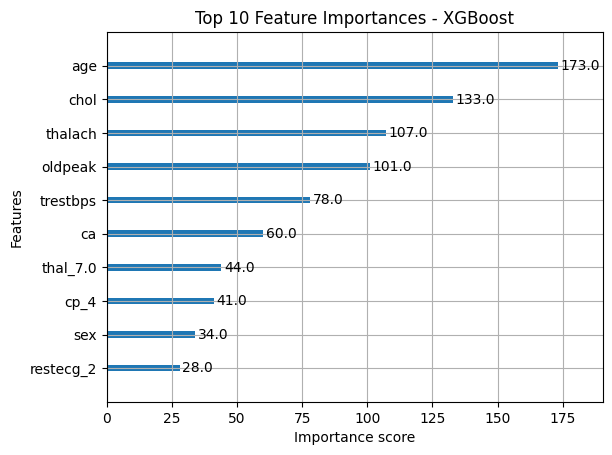

In [26]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(best_xgb, max_num_features=10)
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()


In [28]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 548.0/548.0 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.7 MB 6.7 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.7 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.1 MB 4.6 MB/s eta 0:00:09
   - -------------------------------------- 1.8/38.1 MB 4.2 MB/s eta 0:00:09
   -- ------------------------------------- 2.6/38.1 MB 4.1 MB/s eta 0:00:09
   --- ------------------------------------ 3.4/38.1 MB 4.0 MB/s eta 0:00:09
   ---- ----------------------------------- 4.2/38.1 MB 4.0 MB/s eta 0:00:09
   ----- ----------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import shap

# Ensure model is trained
best_xgb.get_booster()

# Use TreeExplainer for tree-based models
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Global feature importance
shap.summary_plot(shap_values, X_test, plot_type="dot")


ValueError: could not convert string to float: '[4.599156E-1]'

# Saving the Trained Model

In [36]:
import joblib
#joblib.dump(best_xgb, "models/xgb_model.pkl")

feature_columns = X.columns.tolist()   # X is the final training features (one-hot encoded & scaled if applied)
joblib.dump(feature_columns, "models/feature_columns.pkl")
joblib.dump(scaler, "models/scaler.pkl")  # only if you used a scaler and want to reuse it
#joblib.dump(best_xgb, "models/xgb_model.pkl")


['models/scaler.pkl']

In [35]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
